In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- Step 1: Load Data ---

In [3]:

df = pd.read_csv('IMDB Dataset.csv')

print("--- Original Data ---")
df

--- Original Data ---


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


# --- Step 2: Preprocessing ---

In [4]:
# Preprocessing function
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define negation words to KEEP
negation_words = {'no', 'not', 'nor', 'neither', 'never', 
                  "don't", "didn't", "doesn't", "can't", "couldn't", 
                  "won't", "wouldn't", "shouldn't", "isn't", "aren't", 
                  "wasn't", "weren't", "hasn't", "haven't", "hadn't"}

# Remove them from stopwords
stop_words = stop_words.difference(negation_words)

def preprocess_text(text):
    
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'[^a-z\s]', '', text.lower())
    tokens = word_tokenize(text)
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(cleaned_tokens)

In [5]:
df['cleaned_review'] = df['review'].apply(preprocess_text)

print("--- Data After Cleaning ---")

df[['review', 'cleaned_review', 'sentiment']]

--- Data After Cleaning ---


,review,cleaned_review,sentiment
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching oz episode you...,positive
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...,positive
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...,positive
3,Basically there's a family where a little boy ...,basically there family little boy jake think t...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...,positive
...,...,...,...
49995,I thought this movie did a down right good job...,thought movie right good job wasnt creative or...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",bad plot bad dialogue bad acting idiotic direc...,negative
49997,I am a Catholic taught in parochial elementary...,catholic taught parochial elementary school nu...,negative
49998,I'm going to have to disagree with the previou...,im going disagree previous comment side maltin...,negative


# --- Step 3: TF-IDF Vectorization ---

In [6]:
print("--- Starting Step 3: Vectorization ---")

X = df['cleaned_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"Data split: {X_train.shape[0]} training samples, {X_test.shape[0]} testing samples")
print(f"TF-IDF matrix shape (training): {X_train_tfidf.shape}")
print(f"TF-IDF matrix shape (testing): {X_test_tfidf.shape}")
print("--- Finished Step 3 ---\n")

--- Starting Step 3: Vectorization ---
Data split: 40000 training samples, 10000 testing samples
TF-IDF matrix shape (training): (40000, 5000)
TF-IDF matrix shape (testing): (10000, 5000)
--- Finished Step 3 ---



# --- Step 4: Model Building & Evaluation ---

--- Starting Step 4: Model Building & Evaluation ---
Model trained successfully.

Model Accuracy: 88.68%

Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.87      0.88      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix:
[[4331  630]
 [ 502 4537]]

Confusion matrix plot saved as 'confusion_matrix.png'
--- Finished Step 4 ---


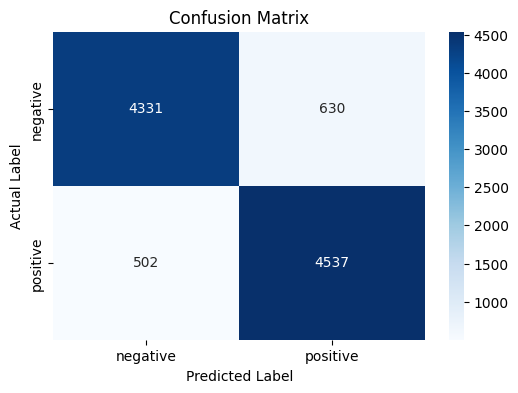

In [ ]:
print("--- Starting Step 4: Model Building & Evaluation ---")

model = LogisticRegression(random_state=42)

model.fit(X_train_tfidf, y_train)
print("Model trained successfully.")

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig("confusion_matrix.png")
print("\nConfusion matrix plot saved as 'confusion_matrix.png'")
print("--- Finished Step 4 ---")

In [ ]:
import pickle

MODEL_FILENAME = 'sentiment_model.pkl'
VECTORIZER_FILENAME = 'tfidf_vectorizer.pkl'

def save_pipeline_objects(model_obj, vectorizer_obj):
    """Saves the trained model and vectorizer to disk."""
    
    # --- 1. Save the Model ---
    with open(MODEL_FILENAME,'wb') as f:
        pickle.dump(model_obj, f)
    with open(VECTORIZER_FILENAME,'wb') as f:
        pickle.dump(vectorizer_obj, f)

save_pipeline_objects(model, tfidf_vectorizer)